In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [8]:
import tensorflow as tf
tf.enable_eager_execution()

from matplotlib import pyplot as plt

from utils import mnist_eager, compute_mmd


# data
batch_size = 128
train_steps = 50
noise = 100

data = mnist_eager(128)

model = tf.keras.Sequential([tf.keras.layers.Dense(256, tf.nn.relu),
                             tf.keras.layers.Dense(512, tf.nn.relu),
                             tf.keras.layers.Dense(1024, tf.nn.relu),
                             tf.keras.layers.Dense(784, tf.nn.sigmoid)])


def loss(imgs):
    generated = model(tf.random_uniform((tf.shape(imgs)[0], noise), minval=-1, maxval=1))
    return tf.sqrt(compute_mmd(imgs, generated, [0.1]))

Step 0
Loss tf.Tensor(1.0480683, shape=(), dtype=float32)
Step 50
Loss tf.Tensor(0.48325342, shape=(), dtype=float32)


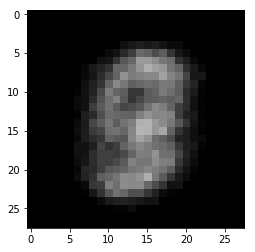

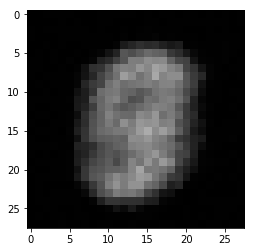

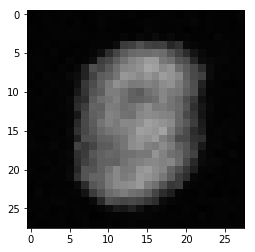

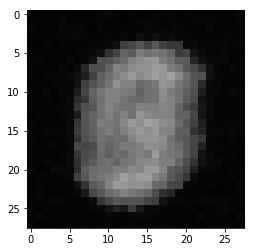

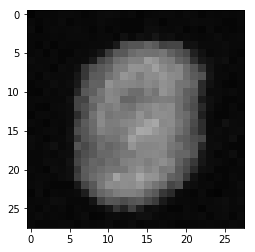

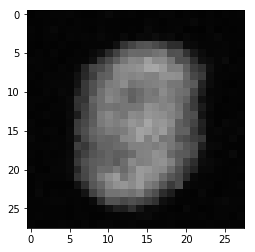

KeyboardInterrupt: 

In [9]:
opt = tf.train.AdamOptimizer()

for step, (img_batch, _) in enumerate(data):
    if step > train_steps:
        break
    
    with tf.GradientTape() as tape:
        mmd = loss(img_batch)
    grads = tape.gradient(mmd, model.variables)
    opt.apply_gradients(zip(grads, model.variables))
    
    if not step % 50:
        print("Step", step)
        print("Loss", mmd)

while True:
        imgs = model(tf.random_uniform((2, 100), minval=-1, maxval=1))
        for thing in imgs:
            plt.imshow(thing.numpy().reshape((28, 28)), cmap="Greys_r", vmin=0, vmax=1)
            plt.show()
            input()